In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from net import train, run_test, evaluate_classifn
from layer import Dense
from activations import Tanh, Softmax, Sigmoid, ReLU, SoftPlus
from losses import mse, mse_prime, categorical_crossentropy, categorical_crossentropy_prime
from datautils import my_train_test_split, encode_categories

In [2]:
iris_data = pd.read_csv('./data/iris.csv')

In [3]:
from net import encode_categories

all_species = np.unique(iris_data['species'])
encoded_species = encode_categories(iris_data['species'], all_species)
encoded_species_df = pd.DataFrame(encoded_species, columns=all_species)


iris_df = pd.concat([iris_data, encoded_species_df], axis=1)
iris_df.drop('species', axis=1, inplace=True)


#### Splitting


In [4]:
x_train, y_train, x_test, y_test = my_train_test_split(df=iris_df, y_columns=['setosa', 'versicolor', 'virginica'], random_state=2, test_size=0.25)


#### Network creation

In [5]:
iris_network = [
    Dense(4, 2),
    Tanh(),
    Dense(2, 3),
    Softmax(3, 3)
]

#### Training 

In [6]:
err_history = train(network=iris_network, X_train=x_train, Y_train=y_train, loss=mse, loss_grad=mse_prime, shuffle=True, epochs=1000, alpha=0.022)


error for epoch  1 =  0.1285476064438926
error for epoch  2 =  0.11871482537875645
error for epoch  3 =  0.1151399347453472
error for epoch  4 =  0.11358369212836442
error for epoch  5 =  0.11268852417886559
error for epoch  6 =  0.11203187912117159
error for epoch  7 =  0.11146897594396805
error for epoch  8 =  0.11093745360612225
error for epoch  9 =  0.11040177613956659
error for epoch  10 =  0.10983798114979827
error for epoch  11 =  0.10922977446934237
error for epoch  12 =  0.10856616057365039
error for epoch  13 =  0.10783887323965331
error for epoch  14 =  0.10704160580148751
error for epoch  15 =  0.10617161143546323
error for epoch  16 =  0.10523128048797233
error for epoch  17 =  0.10422689328261237
error for epoch  18 =  0.10316416245842794
error for epoch  19 =  0.10204209885330714
error for epoch  20 =  0.10084966394620984
error for epoch  21 =  0.0995722698181136
error for epoch  22 =  0.09820507650897585
error for epoch  23 =  0.0967578918835904
error for epoch  24 =  0

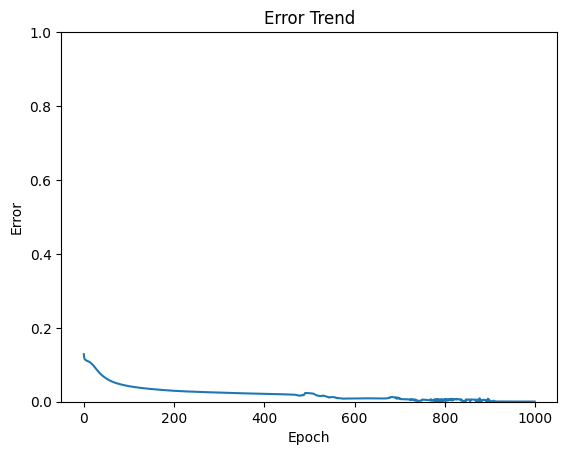

In [7]:
plt.plot(err_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.title('Error Trend')
plt.show()

#### Testing

In [8]:

y_pred = run_test(iris_network, x_test)

In [9]:
evaluate_classifn(y_test, y_pred)

Network accuracy ☢️ 0.8947368421052632
